# Chapter 7. 머신러닝 데이터 분석

## 3. 분류
* 입력 데이터: 대상의 속성
* 출력 데이터: 카테고리(범주형) 값 중에서 어느 한 값을 예측
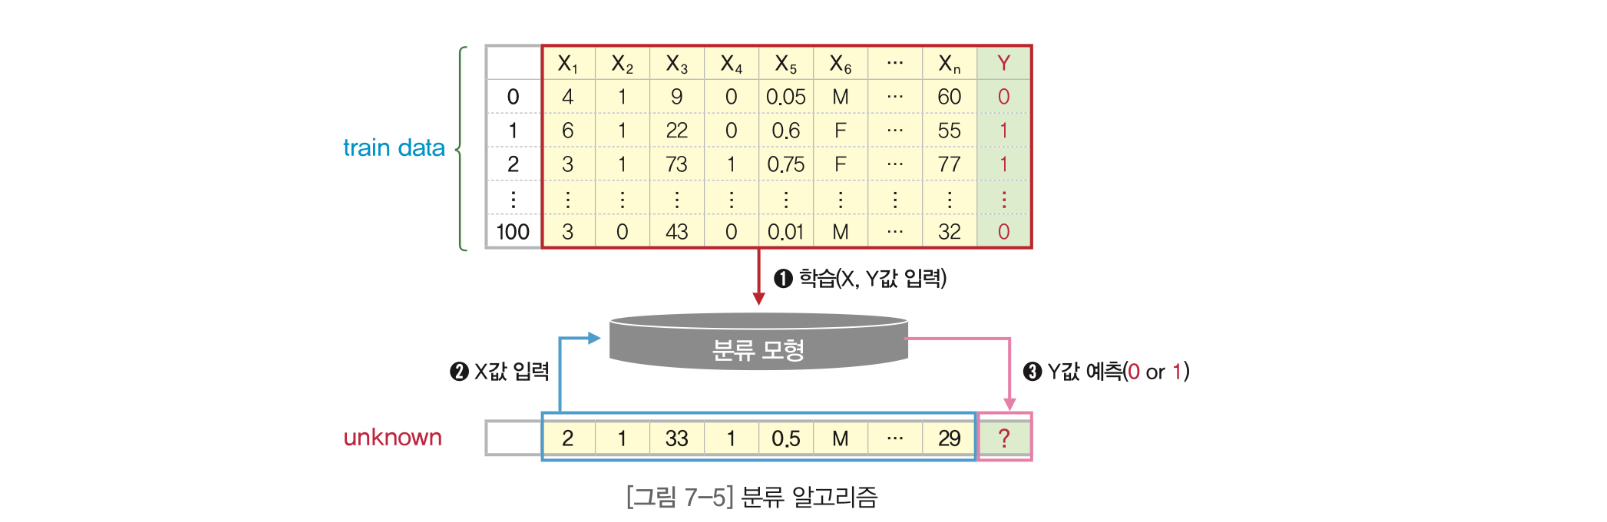
* 고객 분류, 질병 진단, 스팸 메일 필터링, 음성 인식 등 목표 변수가 카테고리 값을 갖는 경우에 사용
* KNN, SVM, Decision Tree, Logistic Regression 등

### 3-1. KNN
* K-Nearest-Neighbors
* 새로운 데이터가 입력되면 기존 데이터 중 가장 속성이 비슷한 k의 이웃을 먼저 찾음 -> 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류 예측
* k 값에 따라 예측의 정확도가 달라지므로, 적절한 k값을 찾는 것이 중요
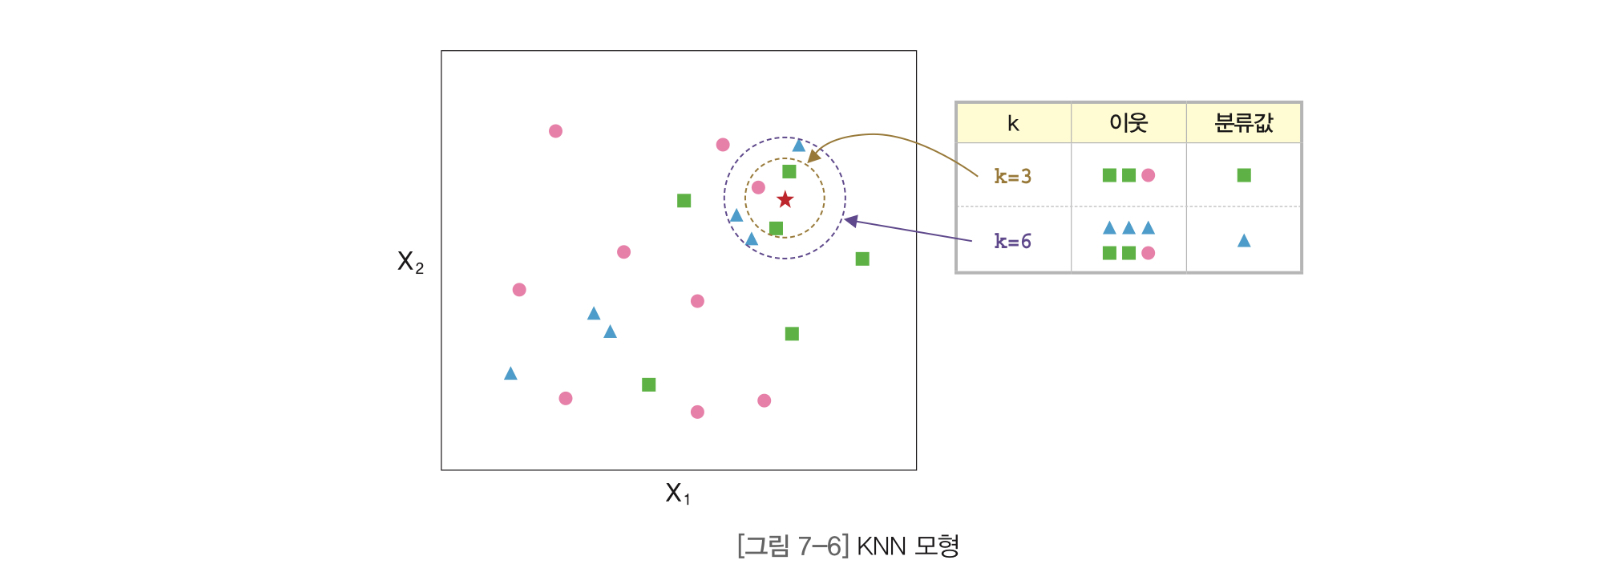

#### 1. 데이터 준비

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# load_dataset 함수를 사용하여 데이터프레임으로 변환
pd.set_option('display.max_columns', 15)
df = sns.load_dataset('titanic')
df.head()

#### 2. 데이터 탐색

In [ ]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제

rdf

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)

rdf

In [ ]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()

rdf['embarked']

#### 3. 분석에 사용할 속성을 선택

In [ ]:
# 분석에 활용할 열(속성)을 선택 

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환


# pd의 get_dummies로 원핫인코딩
onehot_sex

# 기존 ndf와 onehot_sex를 concat
ndf 


# pd의 get_dummies로 원핫인코딩 , prefix 옵션은 'town'
onehot_embarked 

# 기존 ndf와 onehot_embarked를 concat
ndf 

# sex와 embarked 열 삭제


#### 4. 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X =
y =

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

#### 5. KNN 분류 모형 - sklearn 사용

In [ ]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (n_neighbors 옵션은 5로 설정)
knn = 

# train data를 가지고 모형 학습


# test data를 가지고 y_hat을 예측 (분류) 
y_hat

print(y_hat[0:10])
print(y_test.values[0:10])

In [ ]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

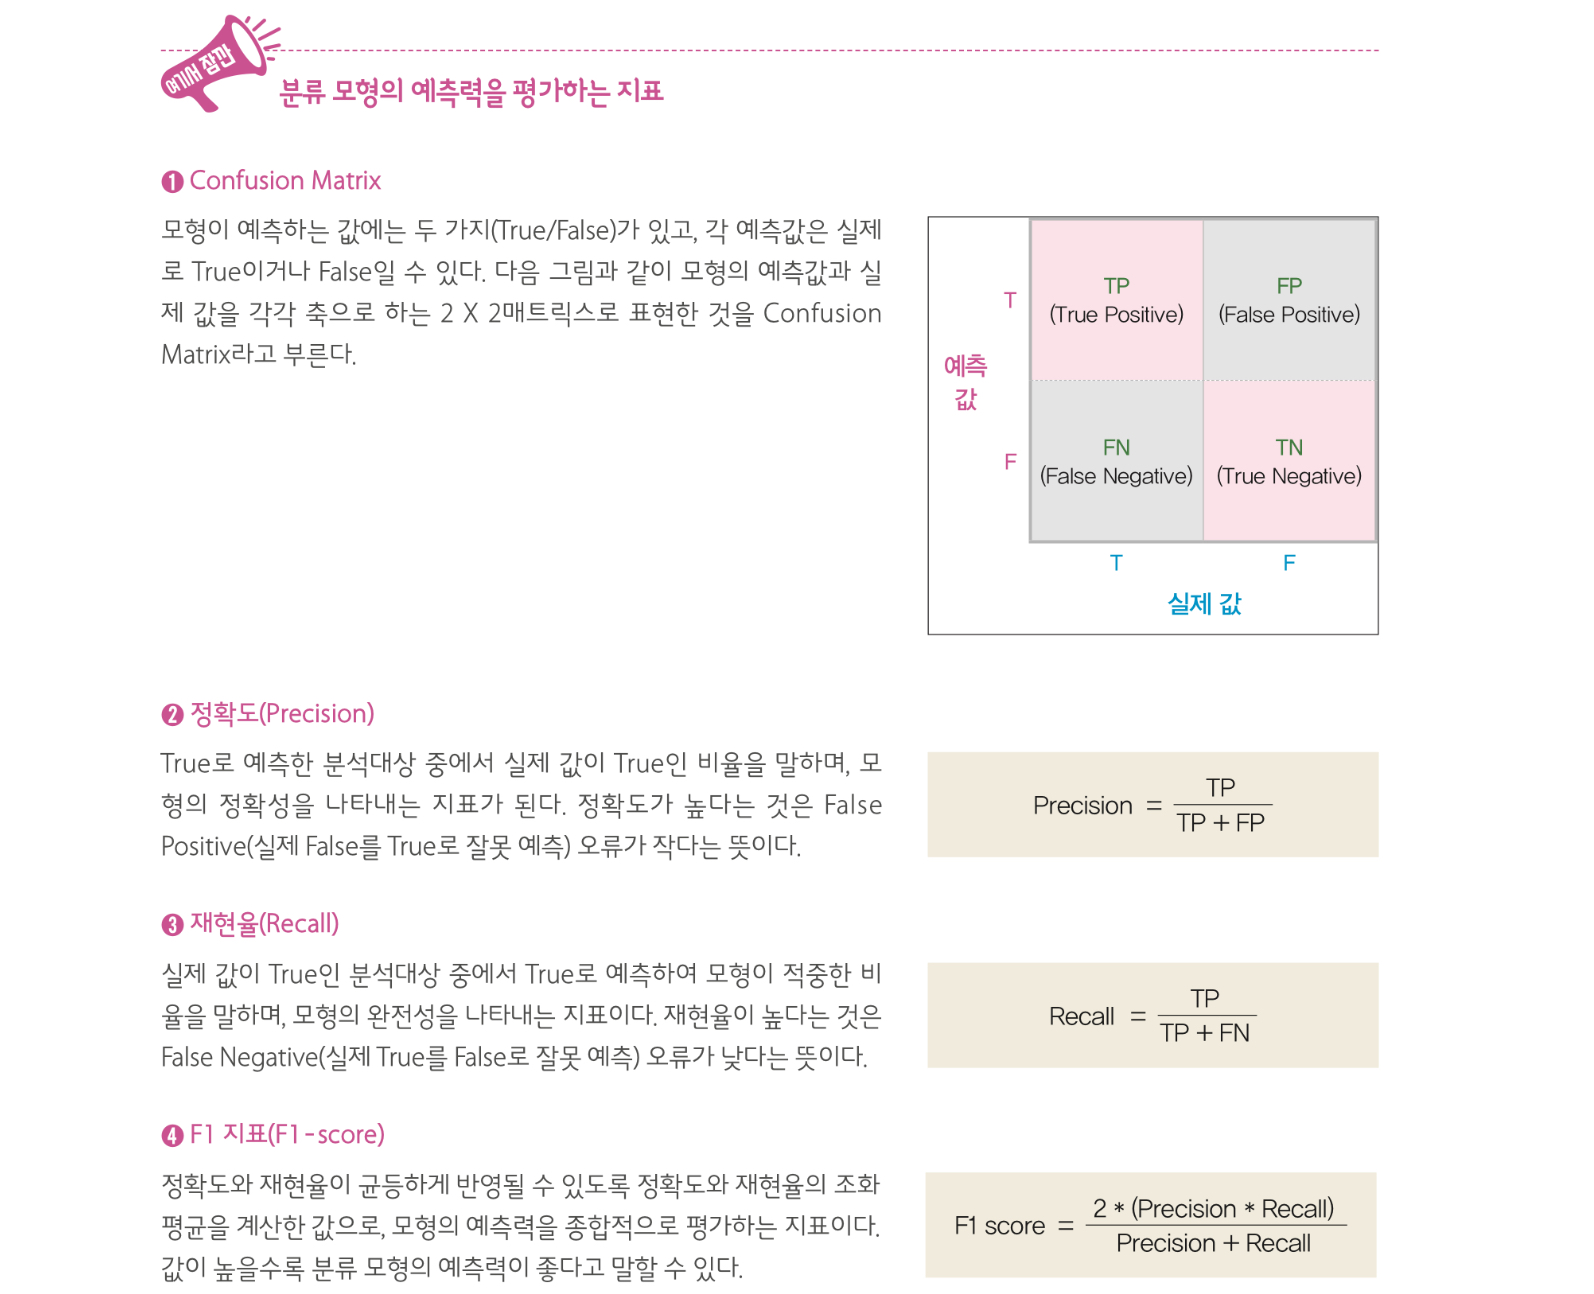

--------

### 3-2. SVM

* Support Vector Machine
* 여러 속성을 나타내는 데이터프레임의 각 열을 열 벡터 형태로 구성
* 속성이 2개면 2차원 공간에 좌표 표시, 3개면 3차원 n개면 n차원 공간에 좌표 표시
* 벡터 공간에 위치한 훈련 데이터의 좌표와 각 데이터가 어떤 분류값을 가졌는지(정답 데이터)를 입력 받아 학습
* 같은 분류 값을 가진 데이터끼리 같은 공간에 위치하도록 벡터 공간을 여러 조각으로 분할
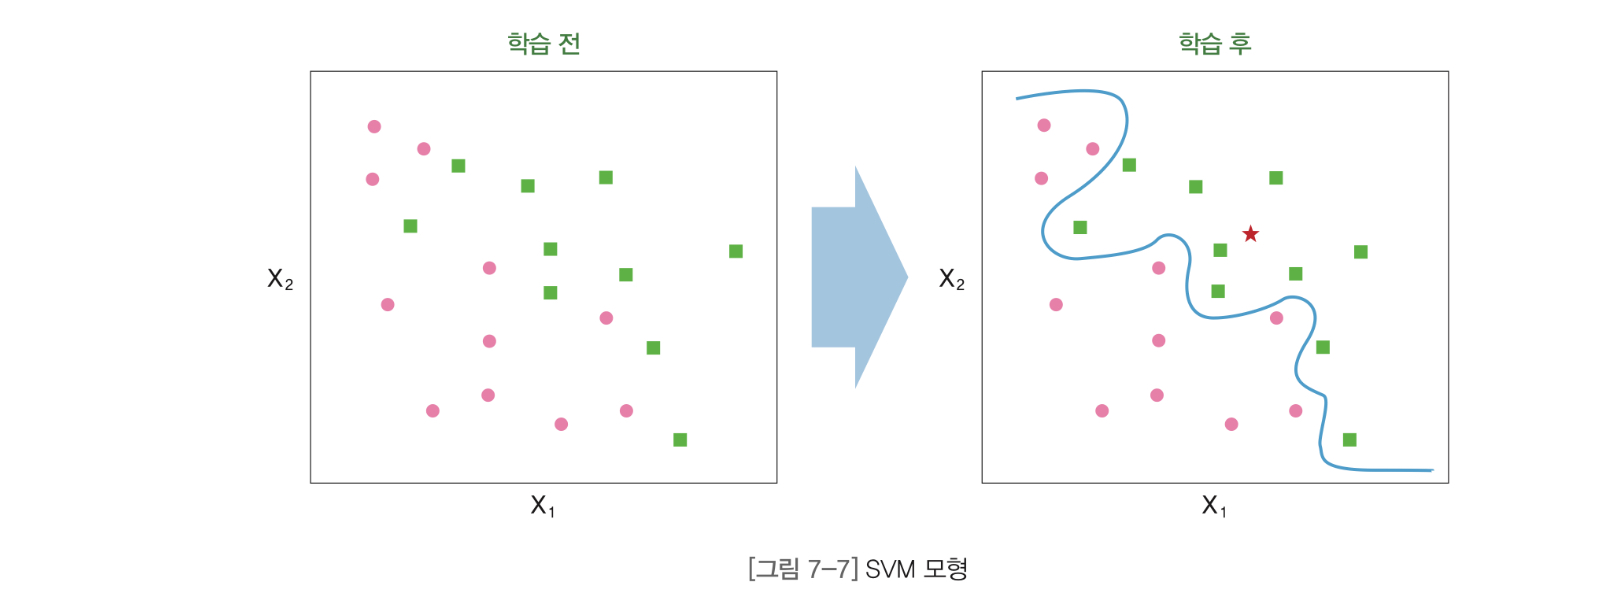

#### 4. 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=ndf.drop('survived', axis=1)  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [ ]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

#### 5. SVM 분류 모형 - sklearn 사용

In [ ]:
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel 옵션은 'rbf' 적용)
svm_model

# train data를 가지고 모형 학습
  

# test data를 가지고 y_hat을 예측 (분류) 
y_hat 

print(y_hat[0:10])
print(y_test.values[0:10])

In [ ]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

-------------

### 3-3. Decision Tree

* 의사결정 나무
* 트리 구조 / 각 분기점(node)에 속성 위치
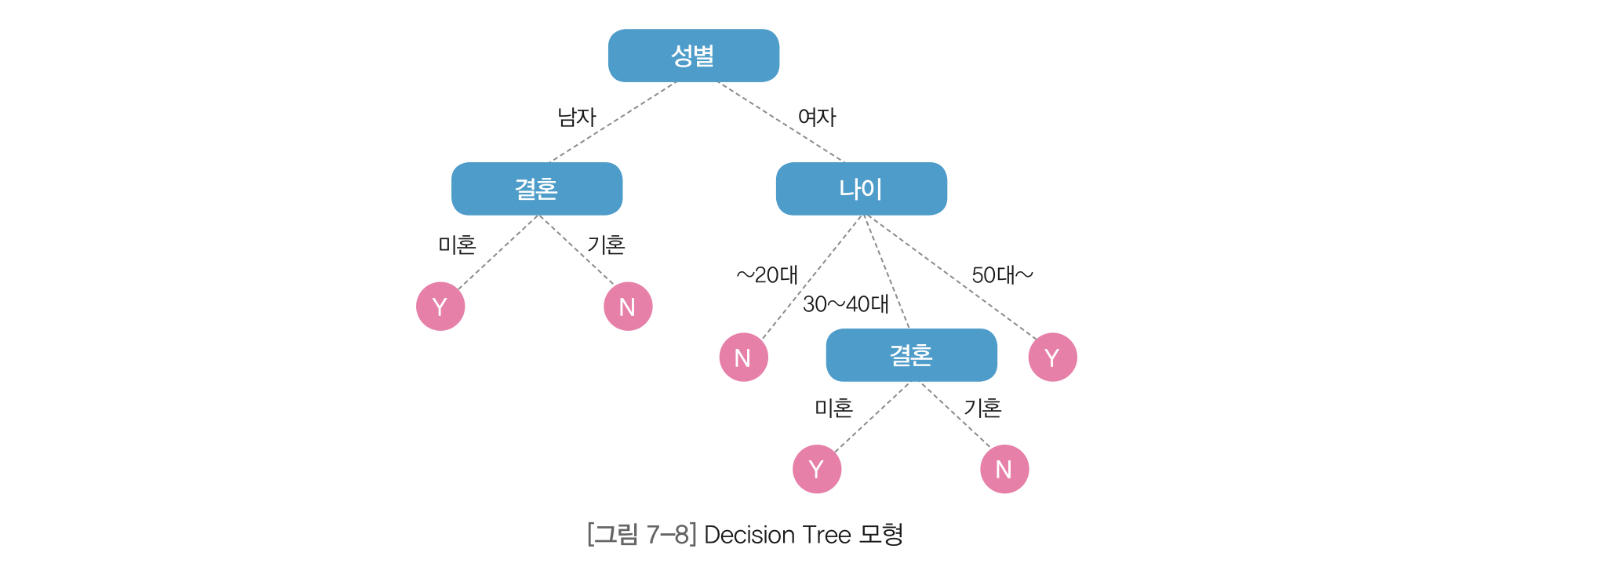

#### 1. 데이터 준비/ 기본 설정

In [ ]:
# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
df.head()

In [ ]:
# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
df.head()

#### 2. 데이터 탐색

In [ ]:
# 데이터 자료형 확인
df.info()

In [ ]:
# 데이터 통계 요약정보 확인
df.describe()

In [ ]:
# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
df['bare_nuclei'].unique()

In [ ]:
# '?'을 np.nan으로 변경
df['bare_nuclei']

# 누락데이터 행을 삭제
df

# 문자열을 정수형으로 변환
df['bare_nuclei']

df['bare_nuclei'].unique()

#### 3. 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=df.drop('class', axis=1)
y=df['class']

In [ ]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

#### 4. Decision Tree 분류 모형 - sklearn 사용

In [ ]:
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = 

# train data를 가지고 모형 학습


# test data를 가지고 y_hat을 예측 (분류)
# 2: benign(양성), 4: malignant(악성)
y_hat =      

print(y_hat[0:10])
print(y_test.values[0:10])

In [ ]:
# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)